In [6]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('legend', fontsize=16)
matplotlib.rcParams['savefig.dpi'] = 1200
from utils_carryover import theta1, theta2
from utils_static_covariate import static_covariate
from utils_empirical import *
from utils_import_data import *

import pickle

%load_ext autoreload
%autoreload 2
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
out_dir = "../result/flu/"
out_path = out_dir 

In [5]:
color_palette = sns.color_palette()
color_palette_dict = dict()
color_palette_dict['$Z_{\mathrm{ff}}$'] = color_palette[0]
color_palette_dict['$Z_{\mathrm{ba}}$'] = color_palette[1]
color_palette_dict['$Z_{\mathrm{ffba}}$'] = color_palette[2]
color_palette_dict['$Z_{\mathrm{opt}}$'] = color_palette[3]
color_palette_dict['$Z_{\mathrm{opt,nonlinear}}$'] = color_palette[3]

color_palette_dict['$Z_{\mathrm{opt,linear}}$'] = color_palette[4]

color_palette_dict['$Z_{\mathrm{opt,stratified}}$'] = color_palette[5]
for G in range(2,5):
    color_palette_dict['$Z_{\mathrm{opt,}K='+str(G)+'}$'] = color_palette[3+G]

In [7]:
save_path = out_dir + "flu_mse_varying_N.pkl"
Y = import_MS_FLU_pos_data()
tau_ratio = -0.1
lag = 2
all_taus = (1+lag - np.array(range(lag+1))); all_taus = all_taus/np.sum(all_taus); all_taus = list(np.mean(Y)*tau_ratio * all_taus)


all_taus_null = [0]*(lag+1)
tau_total = np.mean(Y)*tau_ratio
adj_pct=0.02

In [8]:
T = 7; num_mc=1000; print_epochs = 100; pre_T = 14
all_Ns = [25,30,35,40,45,50];
# all_Ns = [25,30]
timestamp = time.time()
result_gls = dict(); result_all_gls = dict()
result_gls_var = dict(); result_all_gls_var = dict()


for N in all_Ns:
    params = (N, T)
    np.random.seed(123)
    idx_N_list, idx_T_list, shuffle_list = sample_flu_subblocks(Y, N, T, num_mc=num_mc, pre_T=pre_T)
    pre_Ys, all_Ys = get_all_pre_Ys(Y, idx_N_list, idx_T_list, shuffle_list, pre_T)


    new_timestamp = time.time()
    print(N, new_timestamp-timestamp)
    timestamp = new_timestamp

    out_dict, out_total_dict, out_var_dict, out_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, 
                                                                                  adjust_covar=False, return_std=True, method="GLS", adj_pct=adj_pct)


    for J in [1]:
        for G in range(4, 5):
            this_dict, this_total_dict, this_var_dict, this_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, J=J, G=G, 
                                                          adjust_covar=True, adjust_covar_only = True, return_std=True, method="GLS", adj_pct=adj_pct)

            out_dict['opt+_'+str(J)+"_"+str(G)] = this_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_dict['opt+_'+str(J)+"_"+str(G)] = this_total_dict['opt+_'+str(J)+"_"+str(G)]
            out_var_dict['opt+_'+str(J)+"_"+str(G)] = this_var_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_var_dict['opt+_'+str(J)+"_"+str(G)] = this_total_var_dict['opt+_'+str(J)+"_"+str(G)]

    result_gls[N] = out_dict
    result_all_gls[N] = out_total_dict
    result_gls_var[N] = out_var_dict
    result_all_gls_var[N] = out_total_var_dict


25 0.02249288558959961
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
30 24.38244891166687
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
35 25.795916080474854
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
40 27.827181100845337
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 d

In [9]:
T = 7; num_mc=1000; print_epochs = 100; pre_T = 14
all_Ns = [25,30,35,40,45,50];
# all_Ns = [25,30]
timestamp = time.time()
result_ols = dict(); result_all_ols = dict()
result_ols_var = dict(); result_all_ols_var = dict()


for N in all_Ns:
    params = (N, T)
    np.random.seed(123)
    idx_N_list, idx_T_list, shuffle_list = sample_flu_subblocks(Y, N, T, num_mc=num_mc, pre_T=pre_T)
    pre_Ys, all_Ys = get_all_pre_Ys(Y, idx_N_list, idx_T_list, shuffle_list, pre_T)


    new_timestamp = time.time()
    print(N, new_timestamp-timestamp)
    timestamp = new_timestamp

    out_dict, out_total_dict, out_var_dict, out_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, adjust_covar=False, 
                                                                                  return_std=True, method="OLS", adj_pct=adj_pct)

    for J in [1]:
        for G in range(4, 5):
            this_dict, this_total_dict, this_var_dict, this_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, J=J, G=G, 
                                                          adjust_covar=True, adjust_covar_only = True, return_std=True, method="OLS", adj_pct=adj_pct)
            out_dict['opt+_'+str(J)+"_"+str(G)] = this_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_dict['opt+_'+str(J)+"_"+str(G)] = this_total_dict['opt+_'+str(J)+"_"+str(G)]
            out_var_dict['opt+_'+str(J)+"_"+str(G)] = this_var_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_var_dict['opt+_'+str(J)+"_"+str(G)] = this_total_var_dict['opt+_'+str(J)+"_"+str(G)]

    result_ols[N] = out_dict
    result_all_ols[N] = out_total_dict
    result_ols_var[N] = out_var_dict
    result_all_ols_var[N] = out_total_var_dict


25 0.03254127502441406
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
30 16.585129976272583
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
35 16.659344911575317
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
40 16.781744956970215
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 

In [10]:
result_unit = dict(); result_all_unit = dict()
result_unit_var = dict(); result_all_unit_var = dict()


for N in all_Ns:
    params = (N, T)
    np.random.seed(123)
    idx_N_list, idx_T_list, shuffle_list = sample_flu_subblocks(Y, N, T, num_mc=num_mc, pre_T=pre_T)
    pre_Ys, all_Ys = get_all_pre_Ys(Y, idx_N_list, idx_T_list, shuffle_list, pre_T)


    new_timestamp = time.time()
    print(N, new_timestamp-timestamp)
    timestamp = new_timestamp

    out_dict, out_total_dict, out_var_dict, out_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, 
                                                                                  adjust_covar=False, return_std=True, method="OLS", adj_pct=adj_pct,
                                                                                 unit_effect=True, time_effect=False)


    for J in [1]:
        for G in range(4, 5):
            this_dict, this_total_dict, this_var_dict, this_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, J=J, G=G, 
                                                          adjust_covar=True, adjust_covar_only = True, return_std=True, method="OLS", adj_pct=adj_pct,
                                                                                 unit_effect=True, time_effect=False)

            out_dict['opt+_'+str(J)+"_"+str(G)] = this_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_dict['opt+_'+str(J)+"_"+str(G)] = this_total_dict['opt+_'+str(J)+"_"+str(G)]
            out_var_dict['opt+_'+str(J)+"_"+str(G)] = this_var_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_var_dict['opt+_'+str(J)+"_"+str(G)] = this_total_var_dict['opt+_'+str(J)+"_"+str(G)]

    result_unit[N] = out_dict
    result_all_unit[N] = out_total_dict
    result_unit_var[N] = out_var_dict
    result_all_unit_var[N] = out_total_var_dict


25 17.28648805618286
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
30 16.34419894218445
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
35 16.47056007385254
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
40 16.57912015914917
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done


In [11]:
result_time = dict(); result_all_time = dict()
result_time_var = dict(); result_all_time_var = dict()


for N in all_Ns:
    params = (N, T)
    np.random.seed(123)
    idx_N_list, idx_T_list, shuffle_list = sample_flu_subblocks(Y, N, T, num_mc=num_mc, pre_T=pre_T)
    pre_Ys, all_Ys = get_all_pre_Ys(Y, idx_N_list, idx_T_list, shuffle_list, pre_T)


    new_timestamp = time.time()
    print(N, new_timestamp-timestamp)
    timestamp = new_timestamp

    out_dict, out_total_dict, out_var_dict, out_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, 
                                                                                  adjust_covar=False, return_std=True, method="OLS", adj_pct=adj_pct,
                                                                                 unit_effect=False, time_effect=True)


    for J in [1]:
        for G in range(4, 5):
            this_dict, this_total_dict, this_var_dict, this_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, J=J, G=G, 
                                                          adjust_covar=True, adjust_covar_only = True, return_std=True, method="OLS", adj_pct=adj_pct,
                                                                                 unit_effect=False, time_effect=True)

            out_dict['opt+_'+str(J)+"_"+str(G)] = this_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_dict['opt+_'+str(J)+"_"+str(G)] = this_total_dict['opt+_'+str(J)+"_"+str(G)]
            out_var_dict['opt+_'+str(J)+"_"+str(G)] = this_var_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_var_dict['opt+_'+str(J)+"_"+str(G)] = this_total_var_dict['opt+_'+str(J)+"_"+str(G)]

    result_time[N] = out_dict
    result_all_time[N] = out_total_dict
    result_time_var[N] = out_var_dict
    result_all_time_var[N] = out_total_var_dict


25 17.079044103622437
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
30 16.378131866455078
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
35 16.501059770584106
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
40 16.621851205825806
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 d

In [12]:
result_no = dict(); result_all_no = dict()
result_no_var = dict(); result_all_no_var = dict()


for N in all_Ns:
    params = (N, T)
    np.random.seed(123)
    idx_N_list, idx_T_list, shuffle_list = sample_flu_subblocks(Y, N, T, num_mc=num_mc, pre_T=pre_T)
    pre_Ys, all_Ys = get_all_pre_Ys(Y, idx_N_list, idx_T_list, shuffle_list, pre_T)


    new_timestamp = time.time()
    print(N, new_timestamp-timestamp)
    timestamp = new_timestamp

    out_dict, out_total_dict, out_var_dict, out_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, 
                                                                                  adjust_covar=False, return_std=True, method="OLS", adj_pct=adj_pct,
                                                                                 unit_effect=False, time_effect=False)


    for J in [1]:
        for G in range(4, 5):
            this_dict, this_total_dict, this_var_dict, this_total_var_dict = static_covariate(all_taus, all_Ys=all_Ys, pre_Ys=pre_Ys, print_epochs=print_epochs, J=J, G=G, 
                                                          adjust_covar=True, adjust_covar_only = True, return_std=True, method="OLS", adj_pct=adj_pct,
                                                                                 unit_effect=False, time_effect=False)

            out_dict['opt+_'+str(J)+"_"+str(G)] = this_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_dict['opt+_'+str(J)+"_"+str(G)] = this_total_dict['opt+_'+str(J)+"_"+str(G)]
            out_var_dict['opt+_'+str(J)+"_"+str(G)] = this_var_dict['opt+_'+str(J)+"_"+str(G)]
            out_total_var_dict['opt+_'+str(J)+"_"+str(G)] = this_total_var_dict['opt+_'+str(J)+"_"+str(G)]

    result_no[N] = out_dict
    result_all_no[N] = out_total_dict
    result_no_var[N] = out_var_dict
    result_all_no_var[N] = out_total_var_dict


25 17.125741004943848
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
30 16.202631950378418
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
35 16.35960292816162
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done
40 16.450968027114868
100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 do

In [14]:
summary = dict()
summary['GLS'] = result_gls
summary['OLS'] = result_ols
summary['unit'] = result_unit
summary['time'] = result_time
summary['no'] = result_no

assum_dict = {'GLS': '$\mathrm{two}$-$\mathrm{way}\,\mathrm{fe}$+$\mathrm{covar}$', 'OLS': '$\mathrm{two}$-$\mathrm{way}\,\mathrm{fe}$',
             'unit': '$\mathrm{unit}\,\mathrm{fe}\,\mathrm{only}$', 'time': '$\mathrm{time}\,\mathrm{fe}\,\mathrm{only}$',
             'no': '$\mathrm{no}\,\mathrm{fe}$'}

In [15]:
save_path = out_dir + "flu_mse_various_estimation_method.pkl"

In [16]:
with open(save_path, 'wb') as handle:
    pickle.dump(summary, handle, protocol=pickle.HIGHEST_PROTOCOL)

make plots

In [58]:
N = 25
method = "GLS"
out = dict()
N_col = '$N$'
method_col = '$\mathrm{design}$'
assum_col = '$\mathrm{assumption}$'
method_dict = {'ff': '$Z_{\mathrm{ff}}$', 'ba': '$Z_{\mathrm{ba}}$', 'ffba': '$Z_{\mathrm{ffba}}$', 'opt_0': '$Z_{\mathrm{opt,linear}}$', 'opt': '$Z_{\mathrm{opt}}$'}
J = 1
for G in range(4,5):
    method_dict['opt+_'+str(J)+'_'+str(G)] = '$Z_{\mathrm{opt,stratified}}$'

out[N_col] = list()
out[method_col] = list()
out[assum_col] = list()

for idx in range(lag+1):
    this_val_col = '$(\hat{\\tau}_{\mathrm{'+str(idx)+'}}-\\tau_{\mathrm{'+str(idx)+'}})^2$'
    out[this_val_col] = list()


for name in ['ff', 'ba','ffba', 'opt_0', 'opt',  'opt+_1_4']:
#     for name in ['opt_0', 'opt']:
    for assum in ['no', 'unit', 'time', 'OLS', 'GLS']:
        result = summary[assum]
        out[N_col] = out[N_col] + [N] *  num_mc
        out[method_col] = out[method_col] + [method_dict[name]] * num_mc
        out[assum_col] = out[assum_col] + [assum_dict[assum]] * num_mc
        for idx in range(lag+1):
            this_val_col = '$(\hat{\\tau}_{\mathrm{'+str(idx)+'}}-\\tau_{\mathrm{'+str(idx)+'}})^2$'
            out[this_val_col] = out[this_val_col] + list((np.array(result[N][name])[:,idx] - all_taus[lag-idx])**2)
        

out_df = pd.DataFrame(out)
total_val_col = '$\sum_{j}(\hat{\\tau}_{j}-\\tau_{j})^2$'
out_df[total_val_col] = 0 
for idx in range(lag+1):
    this_val_col = '$(\hat{\\tau}_{\mathrm{'+str(idx)+'}}-\\tau_{\mathrm{'+str(idx)+'}})^2$'
    out_df[total_val_col] = out_df[total_val_col] + out_df[this_val_col]

out_df.iloc[:,3:] = out_df.iloc[:,3:] * 1e6

out_df_flu_basic = out_df

In [59]:
sns.set_theme(style="whitegrid", font_scale=1.5)

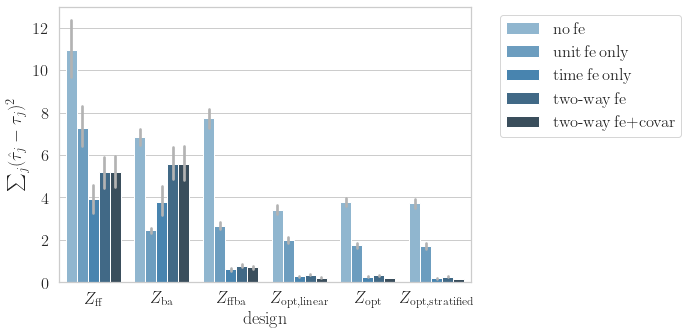

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
# ax.grid()
sns.barplot(ax=ax,
    data=out_df_flu_basic, 
    x=method_col, y=total_val_col, hue=assum_col,
#     ci="sd", 
    palette="Blues_d", errcolor=".7"
)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(out_dir+"flu_N_"+str(N)+"_T_"+str(T)+"_various_methods.pdf")

In [60]:
N = 25
method = "GLS"
out = dict()
method_col = '$\mathrm{design}$'
assum_col = '$\mathrm{assumption}$'
method_dict = {'ff': '$Z_{\mathrm{ff}}$', 'ba': '$Z_{\mathrm{ba}}$', 'ffba': '$Z_{\mathrm{ffba}}$', 'opt_0': '$Z_{\mathrm{opt,linear}}$', 'opt': '$Z_{\mathrm{opt}}$'}
J = 1
for G in range(4,5):
    method_dict['opt+_'+str(J)+'_'+str(G)] = '$Z_{\mathrm{opt,stratified}}$'

out[N_col] = list()
out[method_col] = list()
out[assum_col] = list()

for idx in range(lag+1):
    this_val_col = '$(\hat{\\tau}_{\mathrm{'+str(idx)+'}}-\\tau_{\mathrm{'+str(idx)+'}})^2$'
    out[this_val_col] = list()


for name in ['opt_0', 'opt',  'opt+_1_4']:
#     for name in ['opt_0', 'opt']:
    for assum in ['time', 'OLS', 'GLS']:
        result = summary[assum]
        out[N_col] = out[N_col] + [N] *  num_mc
        out[method_col] = out[method_col] + [method_dict[name]] * num_mc
        out[assum_col] = out[assum_col] + [assum_dict[assum]] * num_mc
        for idx in range(lag+1):
            this_val_col = '$(\hat{\\tau}_{\mathrm{'+str(idx)+'}}-\\tau_{\mathrm{'+str(idx)+'}})^2$'
            out[this_val_col] = out[this_val_col] + list((np.array(result[N][name])[:,idx] - all_taus[lag-idx])**2)
        

out_df = pd.DataFrame(out)
total_val_col = '$\sum_{j}(\hat{\\tau}_{j}-\\tau_{j})^2$'
out_df[total_val_col] = 0 
for idx in range(lag+1):
    this_val_col = '$(\hat{\\tau}_{\mathrm{'+str(idx)+'}}-\\tau_{\mathrm{'+str(idx)+'}})^2$'
    out_df[total_val_col] = out_df[total_val_col] + out_df[this_val_col]

out_df.iloc[:,3:] = out_df.iloc[:,3:] * 1e6

out_df_flu_additional = out_df

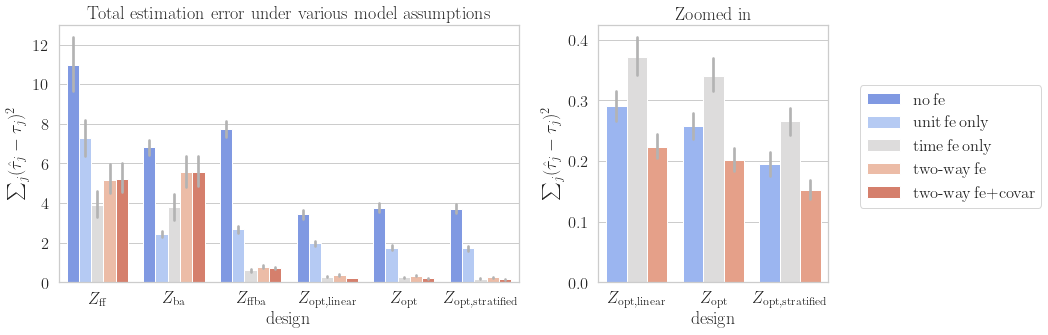

In [61]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5), gridspec_kw={'width_ratios': [2, 1]})
# ax.grid()
# ax.grid()
sns.barplot(ax=axes[0],
    data=out_df_flu_basic, 
    x=method_col, y=total_val_col, hue=assum_col,
#     ci="sd", 
    palette="coolwarm", errcolor=".7"
)
axes[0].legend('',frameon=False)
axes[0].set_title('$\mathrm{Total\ estimation\ error\ under\ various\ model\ assumptions}$')
# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.barplot(ax=axes[1],
    data=out_df_flu_additional, 
    x=method_col, y=total_val_col, hue=assum_col,
#     ci="sd", 
    palette="coolwarm", errcolor=".7"
)
axes[1].legend('',frameon=False)
axes[1].set_title('$\mathrm{Zoomed\ in}$')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.0, 0.75))
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig.savefig(out_dir+"flu_N_"+str(N)+"_T_"+str(T)+"_various_methods-full.pdf", bbox_inches='tight')

In [23]:
from utils_optimization import generate_bm_design
from utils_static_covariate import solve_static_opt_design
from utils_dgp import calc_cv_z_mtrx
from matplotlib.colors import ListedColormap


In [24]:
N = 200; T = 7
sns.set_theme(style="whitegrid", font_scale=1)

In [25]:
bm_treat_df = generate_bm_design(T, adj_pct=0)
opt_treat_df = solve_static_opt_design(T, [0, 1, lag])

all_Zs = dict()
for name in ['ff', 'ba', 'ffba']:
    all_Zs[name] = calc_cv_z_mtrx(N, T, bm_treat_df[name], cv=1)
all_Zs['opt_0'] = calc_cv_z_mtrx(N, T, opt_treat_df[0], cv=2)
all_Zs['opt_1'] = calc_cv_z_mtrx(N, T, opt_treat_df[1], cv=1)
all_Zs['opt'] = calc_cv_z_mtrx(N, T, opt_treat_df[lag], cv=1)
all_Zs['opt+'] = calc_cv_z_mtrx(N, T, opt_treat_df[lag], cv=4)

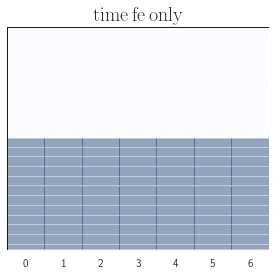

In [32]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['ff'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['time'], fontsize=20)
plt.tight_layout()
plt.savefig(out_dir+"design/time-fe.pdf", dpi=10000)

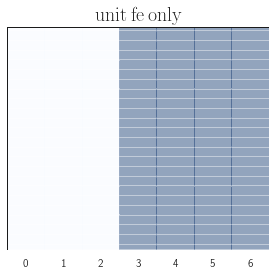

In [33]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['ba'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['unit'], fontsize=20)
plt.tight_layout()
plt.savefig(out_dir+"design/unit-fe.pdf", dpi=10000)

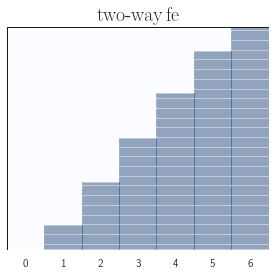

In [34]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['opt'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['OLS'], fontsize=20)
plt.tight_layout()
plt.savefig(out_dir+"design/two-way-fe.pdf", dpi=10000)

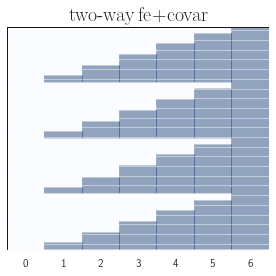

In [35]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['opt+'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['GLS'], fontsize=20)
plt.tight_layout()
plt.savefig(out_dir+"design/two-way-fe-covar.pdf", dpi=10000)

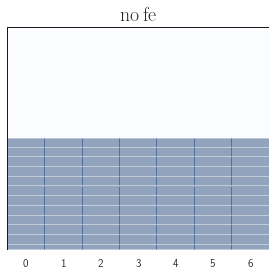

In [36]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['ff'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['no'], fontsize=20)
plt.tight_layout()
plt.savefig(out_dir+"design/no-fe-2.pdf", dpi=10000)

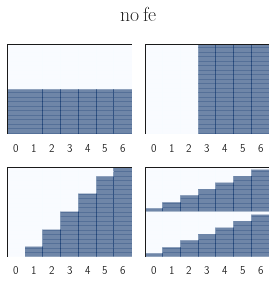

In [37]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(4,4))
sns.heatmap(all_Zs['ff'], ax=axes[0][0], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
sns.heatmap(all_Zs['ba'], ax=axes[0][1], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
sns.heatmap(all_Zs['opt'], ax=axes[1][0], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
sns.heatmap(all_Zs['opt_0'], ax=axes[1][1], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)

for i in [0,1]:
    for j in [0,1]:
        axes[i][j].axhline(y=0, color='k',linewidth=1)
        axes[i][j].axhline(y=N, color='k',linewidth=1)
        axes[i][j].axvline(x=0, color='k',linewidth=1)
        axes[i][j].axvline(x=T, color='k',linewidth=1)
# axes[0][0].set_title(assum_dict['GLS'], fontsize=20)
# plt.title(assum_dict['no'], fontsize=20)
fig.suptitle(assum_dict['no'], fontsize=20)
plt.tight_layout()
plt.savefig(out_dir+"design/no-fe.pdf", dpi=10000)


In [85]:
N = 25
method = "GLS"
out = dict()
N_col = '$N$'
method_col = '$\mathrm{design}$'
assum_col = '$\mathrm{assumption}$'
method_dict = {'ff': '$Z_{\mathrm{ff}}$', 'ba': '$Z_{\mathrm{ba}}$', 'ffba': '$Z_{\mathrm{ffba}}$', 'opt_0': '$Z_{\mathrm{opt,linear}}$', 'opt': '$Z_{\mathrm{opt}}$'}
J = 1
for G in range(4,5):
    method_dict['opt+_'+str(J)+'_'+str(G)] = '$Z_{\mathrm{opt,stratified}}$'

out[N_col] = list()
out[method_col] = list()
out[assum_col] = list()

for idx in range(lag+1):
    bias_col = '$bias(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
    var_col = '$var(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
    out[bias_col] = list()
    out[var_col] = list()


for name in ['ff', 'ba','ffba', 'opt_0', 'opt',  'opt+_1_4']:
    for assum in ['no', 'unit', 'time', 'OLS', 'GLS']:
#     for assum in ['time', 'OLS', 'GLS']:
        result = summary[assum]
        out[N_col] = out[N_col] + [N] *  1
        out[method_col] = out[method_col] + [method_dict[name]] * 1
        out[assum_col] = out[assum_col] + [assum_dict[assum]] * 1
        for idx in range(lag+1):
            bias_col = '$bias(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
            out[bias_col] = out[bias_col] + [(np.mean(np.array(result[N][name])[:,idx]) - all_taus[lag-idx])**2]
            var_col = '$var(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
            out[var_col] = out[var_col] + [np.mean((np.array(result[N][name])[:,idx] - np.mean(np.array(result[N][name])[:,idx]))**2)]
        

out_df = pd.DataFrame(out)
total_bias_col = '$\sum_{j}\mathrm{bias}(\hat{\\tau}_{j})^2$'
total_var_col = '$\sum_{j}\mathrm{var}(\hat{\\tau}_{j})$'
out_df[total_bias_col] = 0 
out_df[total_var_col] = 0 
for idx in range(lag+1):
    bias_col = '$bias(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
    out_df[total_bias_col] = out_df[total_bias_col] + out_df[bias_col]
    var_col = '$var(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
    out_df[total_var_col] = out_df[total_var_col] + out_df[var_col]

out_df.iloc[:,3:] = out_df.iloc[:,3:] * 1e6

# out_df_flu_basic = out_df

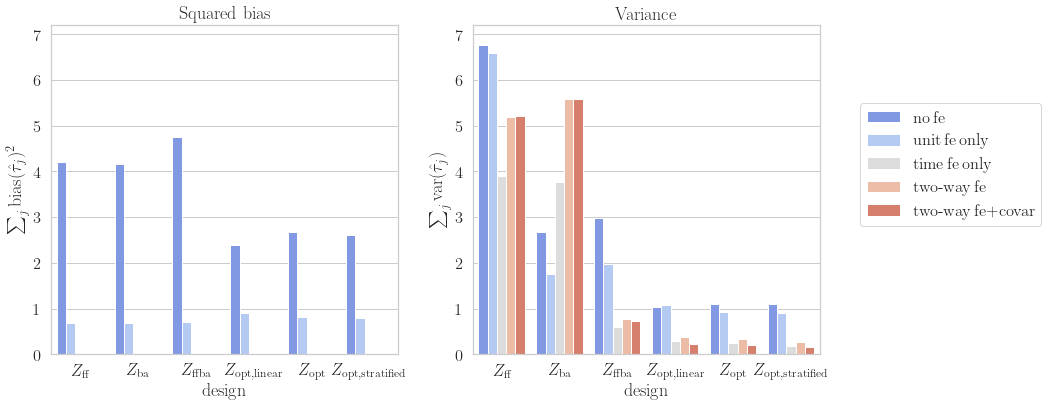

In [86]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6), gridspec_kw={'width_ratios': [1, 1]})
# ax.grid()
# ax.grid()
out1 = sns.barplot(ax=axes[0],
    data=out_df, 
    x=method_col, y=total_bias_col, hue=assum_col,
#     ci="sd", 
    palette="coolwarm", errcolor=".7"
)
out1.set(ylim=[0,7.2])
# axes[0].set_title

axes[0].legend('',frameon=False)
axes[0].set_title('$\mathrm{Squared\ bias}$')
# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
out2 = sns.barplot(ax=axes[1],
    data=out_df, 
    x=method_col, y=total_var_col, hue=assum_col,
#     ci="sd", 
    palette="coolwarm", errcolor=".7"
)
out2.set(ylim=[0,7.2])
axes[1].legend('',frameon=False)
axes[1].set_title('$\mathrm{Variance}$')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.0, 0.75))
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig.savefig(out_dir+"flu_N_"+str(N)+"_T_"+str(T)+"_bias-variance.pdf", bbox_inches='tight')

In [87]:
N = 25
method = "GLS"
out = dict()
N_col = '$N$'
method_col = '$\mathrm{design}$'
assum_col = '$\mathrm{assumption}$'
method_dict = {'ff': '$Z_{\mathrm{ff}}$', 'ba': '$Z_{\mathrm{ba}}$', 'ffba': '$Z_{\mathrm{ffba}}$', 'opt_0': '$Z_{\mathrm{opt,linear}}$', 'opt': '$Z_{\mathrm{opt}}$'}
J = 1
for G in range(4,5):
    method_dict['opt+_'+str(J)+'_'+str(G)] = '$Z_{\mathrm{opt,stratified}}$'

out[N_col] = list()
out[method_col] = list()
out[assum_col] = list()

for idx in range(lag+1):
    bias_col = '$bias(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
    var_col = '$var(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
    out[bias_col] = list()
    out[var_col] = list()


for name in ['ff', 'ba','ffba', 'opt_0', 'opt',  'opt+_1_4']:
#     for assum in ['no', 'unit', 'time', 'OLS', 'GLS']:
    for assum in ['OLS', 'GLS']:
        result = summary[assum]
        out[N_col] = out[N_col] + [N] *  1
        out[method_col] = out[method_col] + [method_dict[name]] * 1
        out[assum_col] = out[assum_col] + [assum_dict[assum]] * 1
        for idx in range(lag+1):
            bias_col = '$bias(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
            out[bias_col] = out[bias_col] + [(np.mean(np.array(result[N][name])[:,idx]) - all_taus[lag-idx])**2]
            var_col = '$var(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
            out[var_col] = out[var_col] + [np.mean((np.array(result[N][name])[:,idx] - np.mean(np.array(result[N][name])[:,idx]))**2)]
        

out_df = pd.DataFrame(out)
total_bias_col = '$\sum_{j}\mathrm{bias}(\hat{\\tau}_{j})^2$'
total_var_col = '$\sum_{j}\mathrm{var}(\hat{\\tau}_{j})$'
out_df[total_bias_col] = 0 
out_df[total_var_col] = 0 
for idx in range(lag+1):
    bias_col = '$bias(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
    out_df[total_bias_col] = out_df[total_bias_col] + out_df[bias_col]
    var_col = '$var(\hat{\\tau}_{\mathrm{'+str(idx)+'}})$'
    out_df[total_var_col] = out_df[total_var_col] + out_df[var_col]

out_df.iloc[:,3:] = out_df.iloc[:,3:] * 1e6

# out_df_flu_basic = out_df

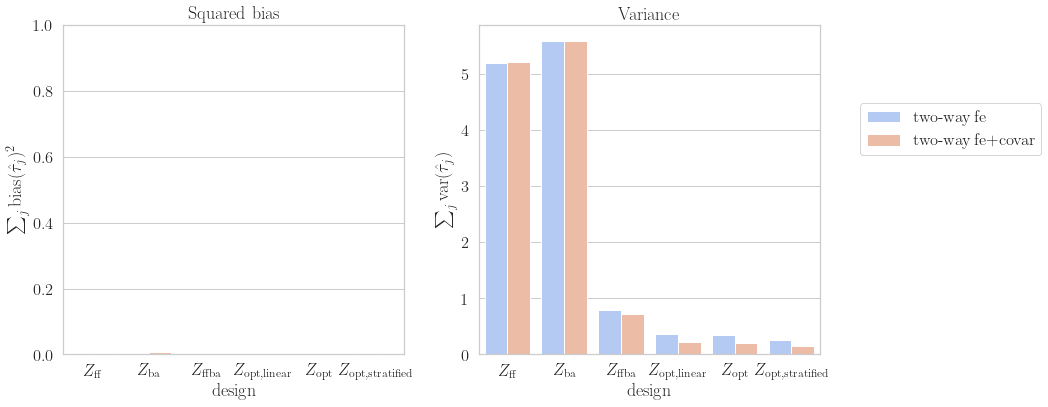

In [88]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6), gridspec_kw={'width_ratios': [1, 1]})
# ax.grid()
# ax.grid()
out1 = sns.barplot(ax=axes[0],
    data=out_df, 
    x=method_col, y=total_bias_col, hue=assum_col,
#     ci="sd", 
    palette="coolwarm", errcolor=".7"
)
out1.set(ylim=[0,1])
# axes[0].set_title

axes[0].legend('',frameon=False)
axes[0].set_title('$\mathrm{Squared\ bias}$')
# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
out2 = sns.barplot(ax=axes[1],
    data=out_df, 
    x=method_col, y=total_var_col, hue=assum_col,
#     ci="sd", 
    palette="coolwarm", errcolor=".7"
)
# out2.set(ylim=[0,7.2])
axes[1].legend('',frameon=False)
axes[1].set_title('$\mathrm{Variance}$')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.0, 0.75))
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig.savefig(out_dir+"flu_N_"+str(N)+"_T_"+str(T)+"_zoomed-in.pdf", bbox_inches='tight')